In [97]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stats
from scipy.stats import ttest_ind
from scipy.stats import norm
import statsmodels.formula.api as smf  
import statsmodels.api as sm

#%matplotlib inline
sns.set_style('darkgrid')

#import warnings
#warnings.filterwarnings('Ignore')

In [98]:
# Reading data file into the data frame  
df1=pd.read_csv("marketing_data.csv", parse_dates=True)
df=pd.DataFrame(df1)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1    Year_Birth          2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

(2240, 28)

Observation : There are columns which contains spaces like Income and year_Birth

Cleaning column headers by removing spaces from the column name

In [99]:
df.columns= df1.columns.str.replace(' ','')
#df.info()

# Step 1: Cleaning column headers by removing spaces from the column name
df.columns= df1.columns.str.replace(' ','')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

Chaning colume Income to float data type

In [100]:
# # Step 2: Changing column data type 
# #    Cleaning Income column - removing $ and then changing data type to column
# #    Remove dollar sign from 'Price' column
df['Income'] = df['Income'].str.replace('$', '').str.replace(',','').astype(float)
#df.info()


Changing datatypes object to string type

In [101]:
#    Converting all 'object' type columns to string 
cols=list(df.select_dtypes(np.object_).columns)
df[cols]=df[cols].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   string 
 3   Marital_Status       2240 non-null   string 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   string 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Clean up of data in Marital_Status and Education

In [102]:
# Cleanup of the values in Marital_Status
print(df['Marital_Status'].unique())
# Date for 'YOLO', 'Alone', 'Absurd' updated to 'Single'
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Single' if str(x)in['Alone','Absurd','YOLO'] else str(x) )
print("New unique valaues in Marital Status",df['Marital_Status'].unique())
print('------------------------------------------------------------------------------------------')
# Clean up the values in Education
#In terms of education, both '2n cycle' and 'master' refer to the same level of education. 
print(df['Education'].unique())
#['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
df['Education'] = df['Education'].apply(lambda x: 'Master' if str(x) == '2n Cycle' else str(x))
#df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'Master' if str(x)= '2n Cycle')
print("New unique valaues in Education", df['Education'].unique())
print('------------------------------------------------------------------------------------------')


<StringArray>
['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone',
 'Absurd']
Length: 8, dtype: string
New unique valaues in Marital Status ['Divorced' 'Single' 'Married' 'Together' 'Widow']
------------------------------------------------------------------------------------------
<StringArray>
['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
Length: 5, dtype: string
New unique valaues in Education ['Graduation' 'PhD' 'Master' 'Basic']
------------------------------------------------------------------------------------------


Finding Null value in the data frame

In [103]:
#    Finding all null values in the data frame 
null_values = df.isnull().sum()

print("---------------------------------------------------------")

print("Count of Null values by columns are ", null_values)
print("---------------------------------------------------------")


---------------------------------------------------------
Count of Null values by columns are  ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64
---------------------------------------------------------


Observation: Column 'Income' has 24 null values

Calculating mean income by Education and popluating Null values by relevant Education value and Marital_Status in the row 

In [104]:
Grouping =df.groupby(['Education','Marital_Status'])
Means = Grouping['Income'].mean()
print("-------------------Mean Income by Education---------------------------------------------")

#means = df.groupby('Education')['Income'].mean()
print(Means)
print("******Polulating Mean income based on Education and Marital status*")

df['Income'] = df.apply(lambda row: Means[row['Education'], row['Marital_Status']] if pd.isnull(row['Income']) else row['Income'], axis=1)
#df['C']      = df.apply(lambda row: means[row['A'], row['B']] if pd.isnull(row['C']) else row['C'], axis=1)

print("----------------checking if null is removed from Income --------------------------------")
null_values = df.isnull().sum()
print(null_values)

-------------------Mean Income by Education---------------------------------------------
Education   Marital_Status
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Divorced          54526.042017
            Married           50800.258741
            Single            51365.633065
            Together          55758.480702
            Widow             54976.657143
Master      Divorced          49972.833333
            Married           50686.055046
            Single            53751.079646
            Together          49495.936709
            Widow             56211.125000
PhD         Divorced          53096.615385
            Married           58138.031579
            Single            53039.666667
            Together          56041.422414
            Widow             60288.083333
Name: Income, dtype: flo

Creating Boxplots for integer columns

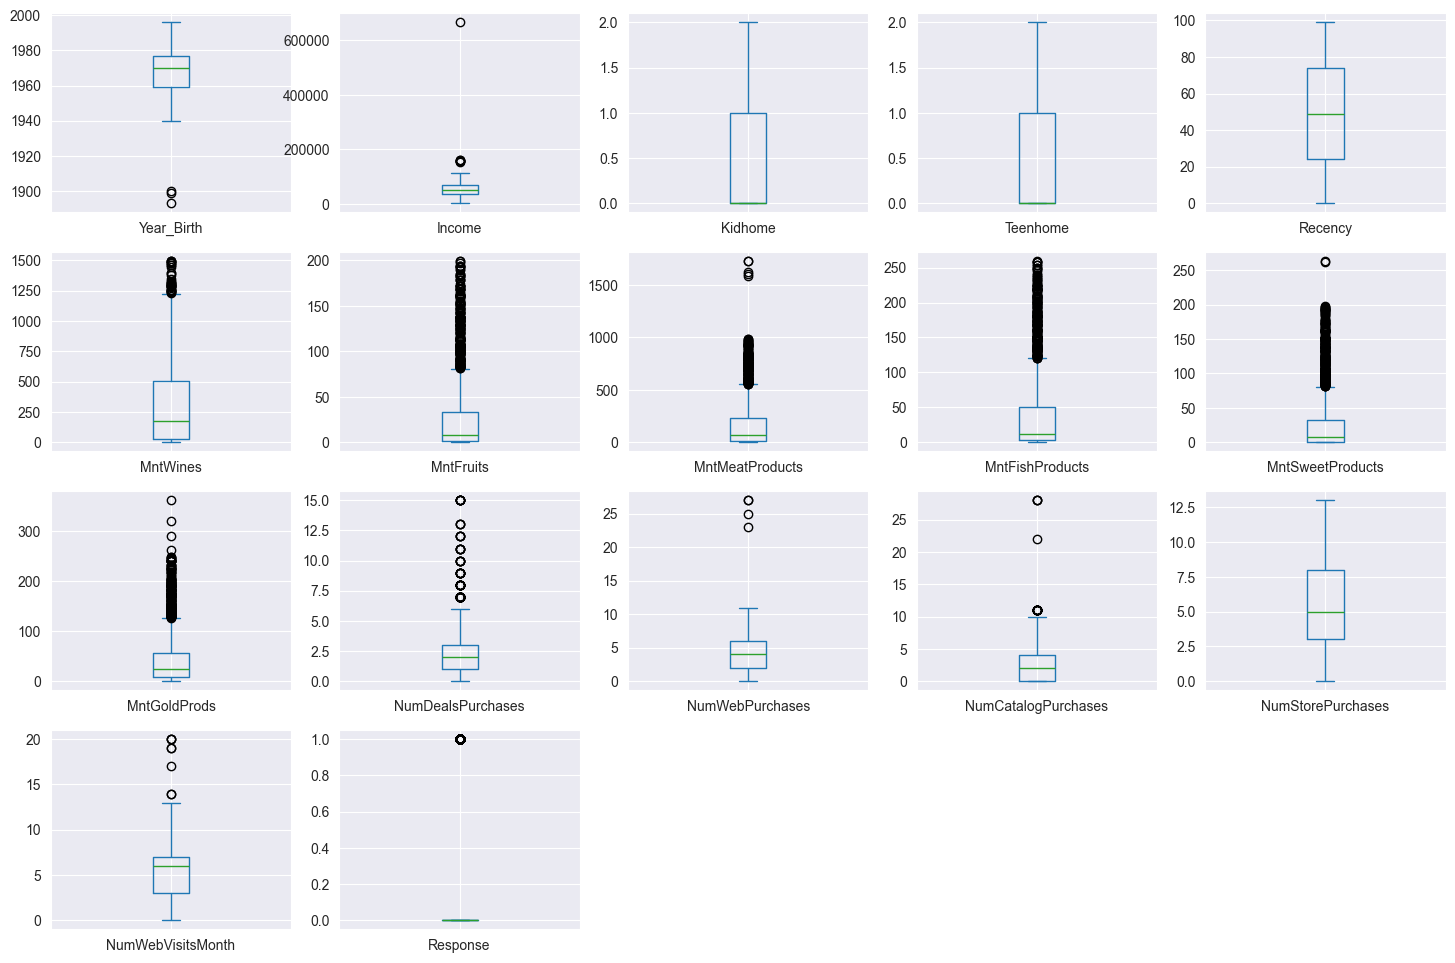

In [105]:

# Creation of boxplots for all integer columns
df2 = df.drop(['ID','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain'],axis=1)
numeric_cols = df2.select_dtypes(include=['number']).columns
df2[numeric_cols].plot(subplots=True, layout=(5,5), kind='box', figsize=(18,15))
plt.show()

Creating histograms for all integer columns

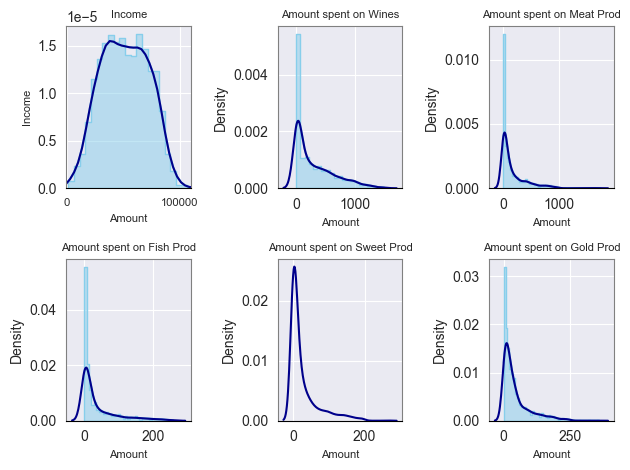

In [106]:
plt.subplot(2,3,1)
plt.xlabel('Amount',fontsize=8)
plt.ylabel('Income',fontsize=8)
sns.histplot(df['Income'],color = 'skyblue', kde=True,element='step', stat='density')
sns.kdeplot(df['Income'], color="darkblue")
plt.xlim(-100, 110000)
plt.gca().spines['top'].set_color('grey')       # Top border
plt.gca().spines['right'].set_color('grey')   # Right border
plt.gca().spines['left'].set_color('grey')     # Left border
plt.gca().spines['bottom'].set_color('black') # Bottom border
plt.xticks(fontsize=8)
plt.title('Income',fontsize=8)


plt.subplot(2,3,2)
# plt.hist(df['MntWines'],alpha=0.7, color = 'yellow')
sns.histplot(df['MntWines'], kde=True,color = 'skyblue',element='step', stat='density')
sns.kdeplot(df['MntWines'], color="darkblue")
plt.xlabel('Amount',fontsize=8)
plt.gca().spines['top'].set_color('grey')       # Top border
plt.gca().spines['right'].set_color('grey')   # Right border
plt.gca().spines['left'].set_color('grey')     # Left border
plt.gca().spines['bottom'].set_color('black') # Bottom border
plt.title('Amount spent on Wines',fontsize=8)

plt.subplot(2,3,3)
# plt.hist(df['MntMeatProducts'],color = 'green')
sns.histplot(df['MntMeatProducts'],color = 'skyblue', kde=True,element='step', stat='density')
sns.kdeplot(df['MntMeatProducts'], color="darkblue")
plt.gca().spines['top'].set_color('grey')       # Top border
plt.gca().spines['right'].set_color('grey')   # Right border
plt.gca().spines['left'].set_color('grey')     # Left border
plt.gca().spines['bottom'].set_color('black') # Bottom border
plt.xlabel('Amount',fontsize=8)

plt.title('Amount spent on Meat Prod',fontsize=8)
# plt.show()

plt.subplot(2,3,4)
# plt.hist(df['MntFishProducts'],color = 'orange')
sns.histplot(df['MntFishProducts'], kde=True,color = 'skyblue',element='step', stat='density')
sns.kdeplot(df['MntFishProducts'], color="darkblue")
plt.gca().spines['top'].set_color('grey')       # Top border
plt.gca().spines['right'].set_color('grey')   # Right border
plt.gca().spines['left'].set_color('grey')     # Left border
plt.gca().spines['bottom'].set_color('black') # Bottom border

plt.xlabel('Amount',fontsize=8)
plt.title('Amount spent on Fish Prod', fontsize=8)

plt.subplot(2,3,5)
# plt.hist(df['MntSweetProducts'],color = 'grey')
# sns.histplot(df['MntSweetProducts'], kde=True,color = 'skyblue',element='step', stat='density')
sns.kdeplot(df['MntSweetProducts'], color="darkblue")
plt.gca().spines['top'].set_color('grey')       # Top border
plt.gca().spines['right'].set_color('grey')   # Right border
plt.gca().spines['left'].set_color('grey')     # Left border
plt.gca().spines['bottom'].set_color('black') # Bottom border
plt.xlabel('Amount',fontsize=8)
plt.title('Amount spent on Sweet Prod',fontsize=8)

plt.subplot(2,3,6)
# plt.hist(df['MntGoldProds'])
sns.histplot(df['MntGoldProds'], kde=True,color = 'skyblue',element='step', stat='density')
sns.kdeplot(df['MntGoldProds'], color="darkblue")
plt.xlabel('Amount',fontsize=8)
plt.gca().spines['top'].set_color('grey')       # Top border
plt.gca().spines['right'].set_color('grey')   # Right border
plt.gca().spines['left'].set_color('grey')     # Left border
plt.gca().spines['bottom'].set_color('black') # Bottom border

plt.title('Amount spent on Gold Prod',fontsize=8)
plt.tight_layout()
plt.show()


Removing Outliers from Income

Income Q1:  35538.75
Income Q3:  68289.75


<function matplotlib.pyplot.show(close=None, block=None)>

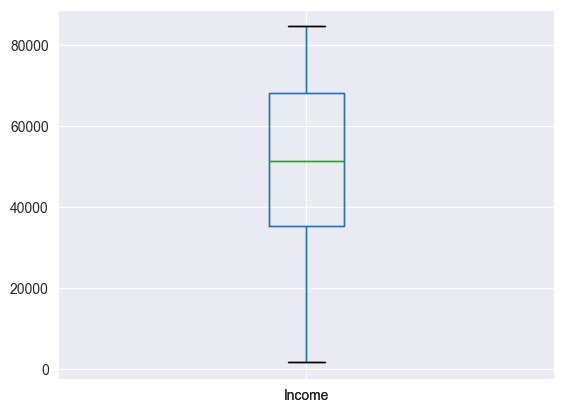

In [108]:
#Removing outliers from income
df.boxplot('Income')
plt.show
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
print("Income Q1: ", Q1)
print("Income Q3: ", Q3)

IQR = Q3 - Q1
# using whiskers to limit the upper bound
LB = Q1 - 1.5*IQR
UB = Q1 + 1.5*IQR
df['Income'].mask(df['Income'] > UB, UB, inplace=True)
df.boxplot('Income')
plt.show

Ordinal Coding: This is used to assign integers to categories with clear ordering or ranking

Using column Education for Ordinal ranking and creatig a new column with integers

In [111]:
# ***Ordinal Coding: This is used to assign integers to categories with clear ordering or ranking***************
# **** Using column Education for Ordinal ranking and creatig a new column with integers
Unique_education = df['Education'].unique()
print("Print Unique Education:" , Unique_education)
education_mapping = {
     'Basic': 1,
      'Graduation' : 2,
      'Master': 3, 
      'PhD' : 4 }
# Apply ordinal encoding using mapping
df['Education_Encoded'] = df['Education'].map(education_mapping)
print(df[['Education', 'Education_Encoded' ]])
# df.head(20)


Print Unique Education: ['Graduation' 'PhD' 'Master' 'Basic']
       Education  Education_Encoded
0     Graduation                  2
1     Graduation                  2
2     Graduation                  2
3     Graduation                  2
4     Graduation                  2
...          ...                ...
2235         PhD                  4
2236      Master                  3
2237  Graduation                  2
2238  Graduation                  2
2239         PhD                  4

[2240 rows x 2 columns]


Hot Encoding: For Nominal categorical variables where there is no inherent order

One-hot encoding using Pandas' get_dummies function for countries columns

In [114]:
# *******Hot Encoding: For Nominal categorical variables where there is no inherent order**********************
# One-hot encoding using Pandas' get_dummies function for countries columns
one_hot_encoded = pd.get_dummies(df['Country'], prefix='Country')

# Concatenate the one-hot encoded Country column with the original DataFrame
df_2 = pd.concat([df, one_hot_encoded], axis=1)
df_2.columns
df_2.head(20)

# One-hot encoding using Pandas' get_dummies function for Marital_Status columns
one_hot_encoded = pd.get_dummies(df_2['Marital_Status'], prefix='Marital_Status')

# Concatenate the one-hot encoded Country column with the original DataFrame
df_3 = pd.concat([df_2, one_hot_encoded], axis=1)
df_3.columns
             

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Education_Encoded',
       'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME',
       'Country_SA', 'Country_SP', 'Country_US', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

Creating new columns for Age, total no of children, total Purchase and total spending

In [116]:
df_3['Age'] = 2023 - pd.to_numeric(df_3['Year_Birth'])
df_3['Total_kids'] = df_3['Kidhome']+ df_2['Teenhome']
df_3['Total_purchase'] = df_3['NumWebPurchases']+ df_3['NumStorePurchases'] + df_3['NumCatalogPurchases']
df_3['Total_spend'] = df_3['MntWines']+ df_3['MntFruits'] + df_3['MntMeatProducts'] + df_3['MntFishProducts'] + df_3['MntSweetProducts'] + df_3['MntGoldProds']

display(df_3.columns)
df_3.head(5)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Education_Encoded',
       'Country_AUS', 'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME',
       'Country_SA', 'Country_SP', 'Country_US', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Age', 'Total_kids',
       'Total_purchase', 'Total_spend'],
      dtype='object')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Country_US,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Age,Total_kids,Total_purchase,Total_spend
0,1826,1970,Graduation,Divorced,84665.25,0,0,6/16/14,0,189,...,False,True,False,False,False,False,53,0,14,1190
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,0,464,...,False,False,False,True,False,False,62,0,17,577
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,0,134,...,True,False,True,False,False,False,65,1,10,251
3,1386,1967,Graduation,Together,32474.00,1,1,05-11-2014,0,10,...,False,False,False,False,True,False,56,2,3,11
4,5371,1989,Graduation,Single,21474.00,1,0,04-08-2014,0,6,...,False,False,False,True,False,False,34,1,6,91


Create a heatmap to showcase the correlation between different pairs of variables.

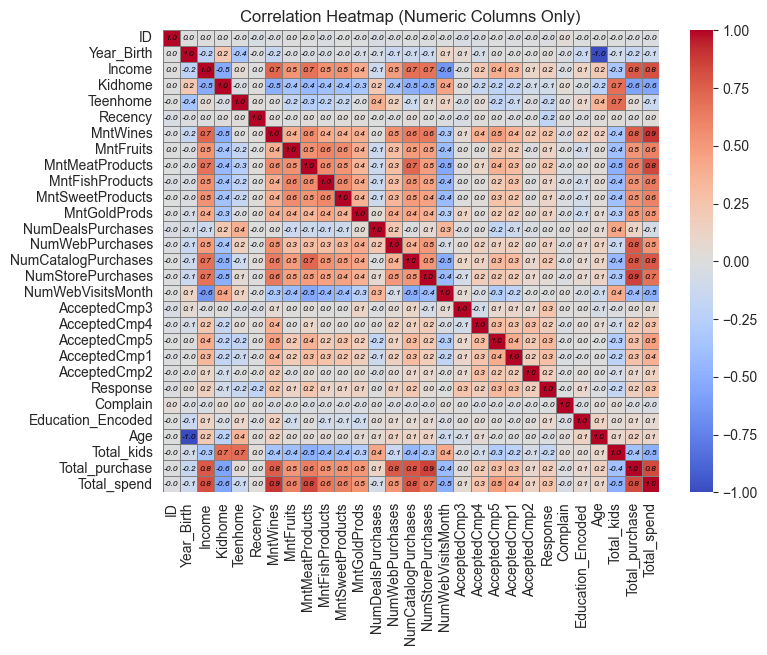

In [121]:
numeric_columns = df_3.select_dtypes(include=['int64', 'float64'])

# Generating a correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f',linewidths=0.5, linecolor='grey')
plt.gca().spines['top'].set_linewidth(2)       # Top border
for text in heatmap.texts:
    text.set_fontsize(6)  # Set font size
    # text.set_fontweight('bold')  # Set font weight
    text.set_fontstyle('italic')  # Set font style
    text.set_color('black')  # Set font color

# Adding labels and title
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()


Visualization Question 1: Use appropriate visualization to help analyze the following:

Which products are performing the best, and which are performing the least in terms of revenue?

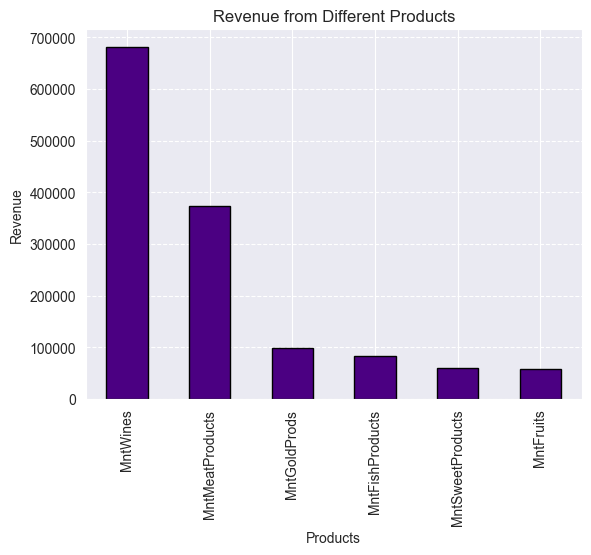

In [128]:
subset_colums = ['MntWines','MntFruits','MntMeatProducts', 	'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', ]
df_4 = df_3[subset_colums]
#print(df_4.head())
col_totals = df_4.sum()
col_totals = col_totals.sort_values(ascending=False)
labels = ['Wine', 'Slice 2', 'Slice 3', 'Slice 4'] 
#plt.figure(figsize=(10, 6))

col_totals.plot(kind='bar', stacked=True, color=['indigo'], ax=plt.gca(),edgecolor='black')
# Adding labels and title
plt.grid(axis='y', linestyle='--')  # Show gridlines on the y-axis with dashed lines
plt.xlabel('Products')
plt.ylabel('Revenue')
plt.title('Revenue from Different Products')
plt.show()


Wines are performing the best

Fruits and sweet products are performaing the least

Visualization Question 2: Use appropriate visualization to help analyze the following:

Is there any pattern between the age of customers and the last campaign acceptance rate?

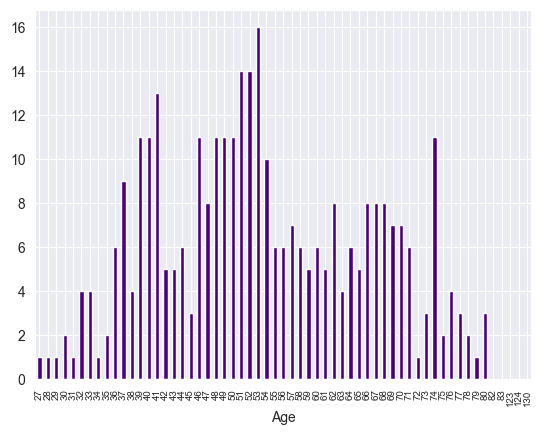

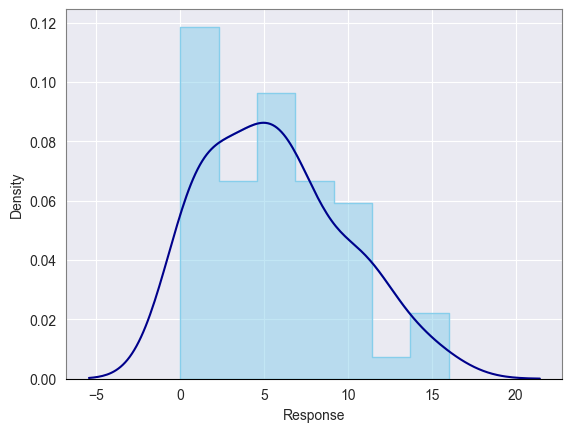

In [133]:
Grouping =df_3.groupby('Age')['Response'].sum()
# print(Grouping)

Grouping.plot(kind='bar', stacked=True, color=['indigo'], ax=plt.gca(),)
plt.xticks(fontname='Arial', fontsize=7)  # Change font to Arial, set font size
plt.show()
sns.histplot(Grouping, kde=True,color = 'skyblue',element='step', stat='density')
sns.kdeplot(Grouping, color="darkblue")
plt.gca().spines['top'].set_color('grey')       # Top border
plt.gca().spines['right'].set_color('grey')   # Right border
plt.gca().spines['left'].set_color('grey')     # Left border
plt.gca().spines['bottom'].set_color('black') # Bottom border

Visualization Question 3: Use appropriate visualization to help analyze the following:

Which Country has the greatest number of customers who accepted the last campaign?

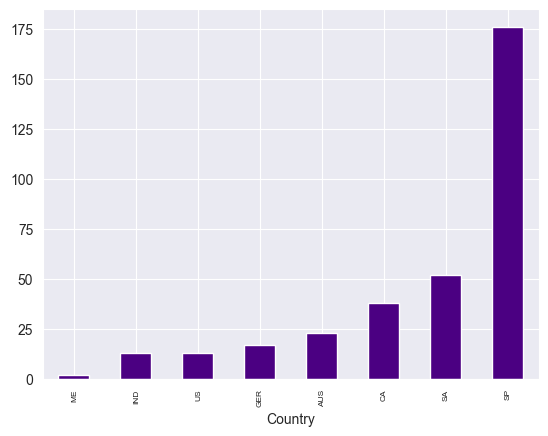

In [135]:
Grouping =df_3.groupby('Country')['Response'].sum()
# print(Grouping)
Grouping=Grouping.sort_values(ascending=True)
Grouping.plot(kind='bar', stacked=True, color=['indigo'], ax=plt.gca())
plt.xticks(fontname='Arial', fontsize=6)  # Change font to Arial, set font size
plt.show()

Spain is the country where maximum number of customers accepted the last campaign

Visualization Question 4: Use appropriate visualization to help analyze the following:

Do you see any pattern in the no. of children at home and total spend?

Total_kids
0    10474
1    13551
2     3640
3      418
Name: Total_purchase, dtype: int64


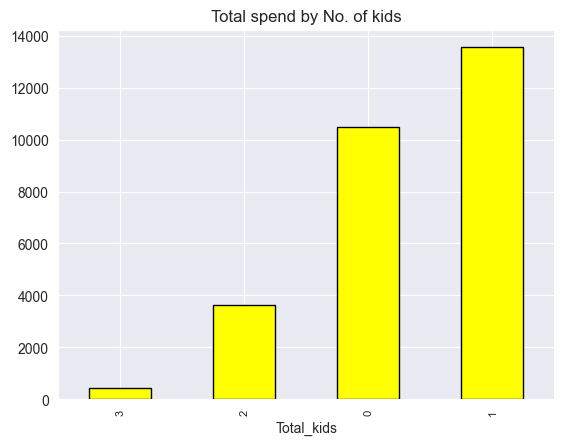

In [138]:
Grouping =df_3.groupby('Total_kids')['Total_purchase'].sum()
print(Grouping)
Grouping=Grouping.sort_values(ascending=True)
ax=Grouping.plot(kind='bar', stacked=True, color=['yellow'], ax=plt.gca(),edgecolor='black')
ax.set_title('Total spend by No. of kids')
plt.xticks(fontname='Arial', fontsize=8)  # Change font to Arial, set font size
plt.show()

Observation:
People with more number of kids tend to spend less
People with 1 kid spend the most

Visualization Question 5: Use appropriate visualization to help analyze the following:

Education background of the customers who complained in the last 2 years.

Education
Basic          0
Graduation    14
Master         6
PhD            1
Name: Complain, dtype: int64


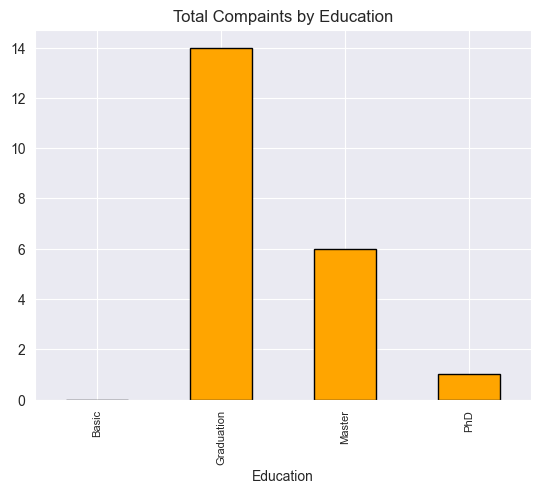

In [140]:
Grouping =df_3.groupby('Education')['Complain'].sum()
print(Grouping)
# Grouping=Grouping.sort_values(ascending=True)
ax= Grouping.plot(kind='bar', stacked=True, color=['orange'], ax=plt.gca(),edgecolor='black')
ax.set_title('Total Compaints by Education')
plt.xticks(fontname='Arial', fontsize=8)  # Change font to Arial, set font size
plt.show()

Observation:
People having Basic qualifications have compained the minimum
Poeple with Graduation compained the maximum

Test the following hypothesis : Question 1

 Older people are not as tech-savvy and probably prefer shopping in-store.

  -> Null Hypothesis (H0): Older people and younger individuals have the same preference for shopping in-store
 
  -> Alternative Hypothesis (H1): Older people prefer shopping in-store more than younger individuals

In [167]:
# Defining Categories for Age
bins = [30,40,50,60,70,100]  # Define the age bins
labels = ['31-40', '41-50', '51-60','61-70','Senior']  # Define labels for each bin/category

# Categorize 'Age' column
df_3['Age_Category'] = pd.cut(df_3['Age'], bins=bins, labels=labels)
# print(df_3.columns)
# df_3.info()
display(df_3.head(10))
correlation = df_3['Age'].corr(df['NumStorePurchases'])
print("Correlation coefficient:", correlation)
age_threshold = 50

# Split the DataFrame into two groups based on the age threshold
younger = df_3[df_3['Age'] < age_threshold]['NumStorePurchases']
older = df_3[df_3['Age'] >= age_threshold]['NumStorePurchases']
# display("Younger:", younger.head())
# Perform independent t-test
t_statistic, p_value = ttest_ind(younger, older, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)
# If the p-value is below a certain significance level (e.g., 0.05), you might reject the null hypothesis, 
# suggesting there's a difference in preference between the age groups.
print("--------------------------------------------------------------------------------")

# Perform z-test
# z_statistic, p_value = ztest(younger, older)
# print("Z-statistic:", z_statistic)
# print("P-value:", p_value)
# Calculate means and standard deviations for each group
mean_younger = np.mean(younger)
mean_older = np.mean(older)
std_younger = np.std(younger, ddof=1)  # Use ddof=1 for sample standard deviation
std_older = np.std(older, ddof=1)
n_younger = len(younger)
n_older = len(older)

# Calculate the standard error of the difference between means
std_error_diff_means = np.sqrt((std_younger ** 2 / n_younger) + (std_older ** 2 / n_older))



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Age,Total_kids,Total_purchase,Total_spend,Age_Category
0,1826,1970,Graduation,Divorced,84665.25,0,0,6/16/14,0,189,...,True,False,False,False,False,53,0,14,1190,51-60
1,1,1961,Graduation,Single,57091.00,0,0,6/15/14,0,464,...,False,False,True,False,False,62,0,17,577,61-70
2,10476,1958,Graduation,Married,67267.00,0,1,5/13/14,0,134,...,False,True,False,False,False,65,1,10,251,61-70
3,1386,1967,Graduation,Together,32474.00,1,1,05-11-2014,0,10,...,False,False,False,True,False,56,2,3,11,51-60
4,5371,1989,Graduation,Single,21474.00,1,0,04-08-2014,0,6,...,False,False,True,False,False,34,1,6,91,31-40
5,7348,1958,PhD,Single,71691.00,0,0,3/17/14,0,336,...,False,False,True,False,False,65,0,16,1192,61-70
6,4073,1954,Master,Married,63564.00,0,0,1/29/14,0,769,...,False,True,False,False,False,69,0,27,1215,61-70
7,1991,1967,Graduation,Together,44931.00,0,1,1/18/14,0,78,...,False,False,False,True,False,56,1,6,96,51-60
8,4047,1954,PhD,Married,65324.00,0,1,01-11-2014,0,384,...,False,True,False,False,False,69,1,17,544,61-70
9,9477,1954,PhD,Married,65324.00,0,1,01-11-2014,0,384,...,False,True,False,False,False,69,1,17,544,61-70


Correlation coefficient: 0.128272055593801
T-statistic: -4.646676397265093
P-value: 3.6205436637395165e-06
--------------------------------------------------------------------------------


Inference:

-> Correlation coefficient value of 0.128 suggests a relatively weak positive linear relationship between the variables. Closer to 1 indicates a stronger positive correlation, while closer to -1 indicates a stronger negative correlation.

-> T-Statistic value of -4.65 suggests a significant difference from the null hypothesis mean

-> P-value of 3.62e-06 (or 3.37e-06) suggests strong evidence against the null hypothesis

-> In both Z-Test and T-Test, the p-values being very small indicate that the results are statistically significant leading to rejection of null hypothesis

Test the following hypothesis : Question 2

Customers with kids probably have less time to visit a store and would prefer to shop online

-->      Null Hypothesis (H0): Customer with kids and without kids have the same preference for shopping online.

-->     Alternative Hypothesis (H1): Customer with kids have less time and prefer to shop online than people without kids

In [146]:
# Split the DataFrame into two groups based on the age threshold
kid_threshold = 1
# younger = df_3[df_3['Age'] < age_threshold]['NumStorePurchases']
without_kids = df_3[df_3['Total_kids'] < kid_threshold]['NumWebPurchases']
with_kids    = df_3[df_3['Total_kids'] >= kid_threshold]['NumWebPurchases']

# Perform independent t-test
t_statistic, p_value = ttest_ind(with_kids, without_kids, equal_var=False)

print("-----------Result of T-Test---------------------------------------------------------------------")

print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("-----------End Result of T-Test---------------------------------------------------------------------")


-----------Result of T-Test---------------------------------------------------------------------
T-statistic: -3.541893836382714
P-value: 0.0004108102700005601
-----------End Result of T-Test---------------------------------------------------------------------


Observation:

--> A negative T-statistic of -3.54 suggests that the sample mean is below the null hypothesis mean

--> In this case, a T-statistic of -3.54 indicates that the observed difference is approximately 3.54 standard deviations below the null hypothesis mean
--> P-value of 0.00041 (or 4.11e-4) is smaller than the common significance level of 0.05, indicating strong evidence against the null hypothesis

Inference:

1. As the P-value is lower tna the 0.05 , the null hypothesis can be rejected
2. This proves that Customers with kids have less time and prefer to shop online

Test the following hypothesis : Question 3

Other distribution channels may cannibalize sales at the store

-->  Null Hypothesis (H0): Other distribution channels like web and catalogue  may not cannibalize the sales at the store

-->  Alternative Hypothesis (H1): The sales at the store does get impacted or cannibalized by the sales in other distrbution channel

In [148]:
X = df_3[['NumWebPurchases', 'NumCatalogPurchases']]  # Independent variables
y = df_3['NumStorePurchases']                   # Dependent variable

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      NumStorePurchases   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     681.7
Date:                Thu, 14 Dec 2023   Prob (F-statistic):          6.63e-232
Time:                        15:07:07   Log-Likelihood:                -5285.7
No. Observations:                2240   AIC:                         1.058e+04
Df Residuals:                    2237   BIC:                         1.059e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9459    

Interpretation:

--> An R-squared value of 0.379 indicates that while the model explains a moderate portion of the variance in 'Purchase from Store'', there might still be other factors not included in the model that contribute to the variability of 'NumStorePuch'

--> The low p-value suggests that 'NumWebPurch' and 'NumCatPurch' have a statistically significant impact on 'NumStorePuch' according to this model

--> However, it's important to know that correlation doesn't necessarily imply causation. Even with a statistically significant relationship, there might be other unaccounted factors influencing 'NumStorePuch'

--> In summary, an R-squared value of 0.379 suggests a moderate level of explanatory power in the model, while the low p-value indicates the statistical significance of the included predictors in explaining the variation in the dependent variable


Test the following hypothesis : Question 4

Does the US fare significantly better than the rest of the world in terms of total purchases?

--> Null Hypothesis (H0): There is no difference in the mean number of purchases between the US and the rest of the world

--> Alternative Hypothesis (H1): The mean number of purchases in the US is significantly different from the rest of the world

In [173]:
from scipy.stats import norm
# Subset data for the US and the rest of the world
data_US = df_3[df_3['Country'] == 'US']['Total_purchase']
data_rest_of_world = df_3[df_3['Country'] != 'US']['Total_purchase']
# print(data_US)
# print(data_rest_of_world)
# Calculate mean and standard deviation for purchases in the US
mean_US = data_US.mean()
print("------------------------------------------------------------------------------")
print('Mean of US : ', mean_US)
std_US = data_US.std()
n_us = len(data_us) # sample size
print('Sample size',n_us)
print(std_US)
print("------------------------------------------------------------------------------")

# Calculate mean and standard deviation for purchases in the rest of the world
mean_rest = data_rest_of_world.mean()
std_rest = data_rest_of_world.std()
n_rest = len(data_rest_of_world) # sample size
print('Mean of Rest fo the world : ', mean_rest)
print(std_rest)
print('Sample size of rest of the world :', n_rest)
print("------------------------------------------------------------------------------")

# Perform Z-test
z_statistic = (mean_US - mean_rest) / np.sqrt((std_US**2 / n_us) + (std_rest**2 / n_rest))

print('Z-Stats Value is : ', z_statistic)

# Assuming alpha (significance level) is 0.05
alpha = 0.05

# Calculate the critical Z-value for a two-tailed test.
critical_z_value = norm.ppf(1 - alpha/2)
print('Critical Value is : ', critical_z_value)
# Compare the Z-statistic with critical value
print("------------------------------------------------------------------------------")

if abs(z_statistic) > critical_z_value:
    print("Reject the null hypothesis. The US fares significantly differently in terms of total purchases.")
else:
    print("Fail to reject the null hypothesis. There is insufficient evidence to suggest a significant difference.")

------------------------------------------------------------------------------
Mean of US :  13.513761467889909
Sample size 109
7.116249895289317
------------------------------------------------------------------------------
Mean of Rest fo the world :  12.487095260441107
7.208380461828474
Sample size of rest of the world : 2131
------------------------------------------------------------------------------
Z-Stats Value is :  1.4681953545474953
Critical Value is :  1.959963984540054
------------------------------------------------------------------------------
Fail to reject the null hypothesis. There is insufficient evidence to suggest a significant difference.


Based on the abovev calcultion:

The Z-statistic value (1.468) is less than the critical value (1.96).

Therefore, based on this comparison, the null hypothesis at the specified significance level is NOT rejected

Inference :
--> There is no difference in the mean number of purchases between the US and the rest of the world
